# 기본 설정

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm import tqdm_notebook as tqdm
import numpy as np
import os
from glob import glob 
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import lightgbm as lgb
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import (roc_curve, auc, accuracy_score)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier, plot_importance
from sklearn import metrics
from sklearn.metrics import pairwise_distances
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import glob
from IPython.display import display, HTML

import multiprocessing as mp
print('Number of CPU cores:', mp.cpu_count())

Number of CPU cores: 12


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from tqdm import tqdm_notebook as tqdm
import numpy as np
from glob import glob
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

import multiprocessing as mp
print('Number of CPU cores:', mp.cpu_count())

Number of CPU cores: 12


In [4]:
variable_dtype = pd.read_excel("../[Track1_데이터4] variable_dtype.xlsx")

In [5]:
dict_data = {}
for data in glob('*.csv'):
    name = data.split('.')[0]
    print(name)
    dict_data[name] = pd.read_csv(data, encoding='euc-kr')

quiz
cst_feat_feb_quiz
val
cst_feat_jan
mrc_info
train


# Filter categorical columns

In [6]:
df_mrc = pd.concat([dict_data['train'], dict_data['val']])
df = df_mrc.merge(dict_data['cst_feat_jan'], how='left', on="cst_id_di")

In [7]:
df

cst_id_di  MRC_ID_DI   VAR002  VAR003   VAR004   VAR005   VAR006  VAR007  VAR008   VAR009  VAR010   VAR011   VAR012   VAR013   VAR014  VAR015  VAR016  VAR017  VAR018   VAR019   VAR020   VAR021   VAR022   VAR023   VAR024   VAR025  VAR026   VAR027   VAR028   VAR029   VAR030  VAR031   VAR032   VAR033   VAR034   VAR035  VAR036   VAR037   VAR038   VAR039   VAR040   VAR041  VAR042   VAR043   VAR044   VAR045   VAR046   VAR047   VAR048   VAR049  ...  VAR178  VAR179   VAR180  VAR181   VAR182   VAR183   VAR184   VAR185   VAR186   VAR187   VAR188   VAR189   VAR190   VAR191  VAR192   VAR193   VAR194   VAR195   VAR196  VAR197   VAR198  VAR199   VAR200   VAR201   VAR202   VAR203   VAR204   VAR205   VAR206   VAR207  VAR208   VAR209   VAR210   VAR211   VAR212   VAR213   VAR214   VAR215   VAR216   VAR217   VAR218   VAR219   VAR220   VAR221   VAR222   VAR223   VAR224   VAR225   VAR226   VAR227
0       90000000003          0 -0.02438  0.5574  0.03330 -0.16819  0.47308       0  0.4832  0.22558  0.7030  0.52756  0.37048 -0.46270 -0.51311       0  0.0053  0.0457       0 -0.47469 -0.05412  0.35447  0.02470  0.08281  0.15881  0.31802       0  0.49211  0.42831 -0.29062 -0.14369  0.0301 -0.48468  0.06394  0.37780 -0.38244  0.0029 -0.25822  0.44000  0.43275 -0.04608 -0.14626  0.0447 -0.39143 -0.08706 -0.04955  0.12891  0.52981  0.03172 -0.18750  ...  0.5524       0 -0.10068  0.0092  0.03974 -0.12877  0.27737 -0.01816 -0.48211 -0.26107  0.21727  0.43217  0.08468 -0.40895  0.1794 -0.09317 -0.08511 -0.08127 -0.59618  0.0054 -0.23635       0  0.17488 -0.16801 -0.45058  0.68462  0.69091  0.25896 -0.08855 -0.17158       0 -0.26256 -0.24129  0.05623 -0.10093 -0.00042  0.23027  0.26068 -0.35145  0.17076  0.46899 -0.37015 -0.08146 -0.14729 -0.48325 -0.13221 -0.07368 -0.00088 -0.27906  0.24657
1       90000000006          0  0.01635  0.9840  0.33343 -0.35664  0.31725       1  0.3642  0.61984  0.0307  0.45824  0.34812 -0.34764 -0.01273       1  0.0042  0.0198       0 -0.26118 -0.19758  0.59550  0.12663 -0.17034 -0.45976  0.39790       0  0.08345  0.03025 -0.37373 -0.27354  0.0490 -0.21326 -0.13410  0.45987 -0.45736  0.6432 -0.46337  0.05895  0.66428 -0.07391 -0.44666  0.0270 -0.57041 -0.31409 -0.18634  0.28718  0.59251 -0.20552  0.12388  ...  0.0356       0 -0.27662  0.0041  0.01203 -0.20720  0.51927  0.05694 -0.02119 -0.50210 -0.00779 -0.07561  0.24172  0.07813  0.6428 -0.29811 -0.25871 -0.26234 -0.27024  0.0048 -0.37216       0  0.31705 -0.27720 -0.36614  0.66847  0.63441 -0.25729 -0.28089 -0.35974       0 -0.43106 -0.14855 -0.37842 -0.20628 -0.30776  0.26571  0.57852 -0.43703 -0.45285  0.61719 -0.57482 -0.30712 -0.31664 -0.69605 -0.35557 -0.12839 -0.24843 -0.39112  0.42928
2       90000000007          0 -0.02634  0.1279 -0.11887 -0.04039  0.60425       0  0.2180 -0.01968  0.5214  0.44441  0.58878 -0.33039 -0.33452       1  0.0023  0.0085       0 -0.22726  0.00189  0.16102  0.25061  0.02793  0.24411 -0.09407       0  0.36461 -0.09348 -0.00705 -0.04356  0.6081 -0.27057  0.42279  0.07238 -0.07926  0.2426 -0.02265  0.06478  0.11117 -0.08222 -0.06549  0.1213  0.03009 -0.01354  0.00371  0.16426  0.23617  0.29781  0.13035  ...  0.9240       0 -0.01488  0.0021  0.01541  0.17764 -0.08051  0.30702 -0.21023  0.01606  0.02196  0.11668  0.18771 -0.02905  0.2835 -0.00773 -0.00116  0.00468 -0.25456  0.0051  0.10580       0 -0.23435 -0.08062 -0.29454  0.28955  0.42931  0.07685 -0.01675 -0.02860       0  0.19778 -0.00939 -0.00897  0.00482  0.01496  0.29840 -0.17636 -0.45322 -0.01951 -0.04259 -0.00811 -0.00955 -0.04018  0.01891 -0.04929 -0.00756  0.04412 -0.16766  0.36213
3       90000000008          0  0.06713  0.4197  0.06721 -0.10704  0.49907       1  0.7085  0.19513  0.1202  0.70449  0.51032 -0.50266 -0.43218       1  0.0011  0.7353       0 -0.47922 -0.02628  0.35980  0.12944 -0.07166  0.01994  0.22894       0  0.43761  0.29530 -0.08881 -0.06188  0.9999 -0.45538 -0.03847  0.34738 -0.42881  0.2862 -0.12805  0.31678  0.58809 -0.07443 -0.26650  0.0800 -0.38916 -0.05897 -0.04950

In [8]:
cat_column = variable_dtype[variable_dtype['dType']=='categorical']['Variable_Name'].tolist()

num_column = [column for column in df.iloc[:, 2:].columns.tolist() if column not in cat_column]

cat_column.extend(num_column)

new_column = cat_column.copy()
new_column.insert(0, 'MRC_ID_DI')
new_column.insert(0, 'cst_id_di')

# 1. T-sne Visualization

## Total class

In [9]:
df_sort = df[new_column]
df_sort

cst_id_di  MRC_ID_DI  VAR007  VAR015  VAR018  VAR026  VAR059  VAR066  VAR067  VAR070  VAR071  VAR077  VAR078  VAR094  VAR096  VAR097  VAR098  VAR107  VAR111  VAR124  VAR127  VAR143  VAR144  VAR145  VAR148  VAR165  VAR177  VAR179  VAR199  VAR208   VAR002  VAR003   VAR004   VAR005   VAR006  VAR008   VAR009  VAR010   VAR011   VAR012   VAR013   VAR014  VAR016  VAR017   VAR019   VAR020   VAR021   VAR022   VAR023   VAR024  ...   VAR174   VAR175   VAR176  VAR178   VAR180  VAR181   VAR182   VAR183   VAR184   VAR185   VAR186   VAR187   VAR188   VAR189   VAR190   VAR191  VAR192   VAR193   VAR194   VAR195   VAR196  VAR197   VAR198   VAR200   VAR201   VAR202   VAR203   VAR204   VAR205   VAR206   VAR207   VAR209   VAR210   VAR211   VAR212   VAR213   VAR214   VAR215   VAR216   VAR217   VAR218   VAR219   VAR220   VAR221   VAR222   VAR223   VAR224   VAR225   VAR226   VAR227
0       90000000003          0       0       0       0       0       1       0       1       0       0       0       0       0       0       0       1       1       0       0       0       0       0       0       0       1       0       0       0       0 -0.02438  0.5574  0.03330 -0.16819  0.47308  0.4832  0.22558  0.7030  0.52756  0.37048 -0.46270 -0.51311  0.0053  0.0457 -0.47469 -0.05412  0.35447  0.02470  0.08281  0.15881  ... -0.35511  0.10907 -0.58695  0.5524 -0.10068  0.0092  0.03974 -0.12877  0.27737 -0.01816 -0.48211 -0.26107  0.21727  0.43217  0.08468 -0.40895  0.1794 -0.09317 -0.08511 -0.08127 -0.59618  0.0054 -0.23635  0.17488 -0.16801 -0.45058  0.68462  0.69091  0.25896 -0.08855 -0.17158 -0.26256 -0.24129  0.05623 -0.10093 -0.00042  0.23027  0.26068 -0.35145  0.17076  0.46899 -0.37015 -0.08146 -0.14729 -0.48325 -0.13221 -0.07368 -0.00088 -0.27906  0.24657
1       90000000006          0       1       1       0       0       0       0       1       0       0       0       0       0       0       0       1       1       0       0       0       0       0       0       0       0       0       0       0       0  0.01635  0.9840  0.33343 -0.35664  0.31725  0.3642  0.61984  0.0307  0.45824  0.34812 -0.34764 -0.01273  0.0042  0.0198 -0.26118 -0.19758  0.59550  0.12663 -0.17034 -0.45976  ... -0.42216  0.07952 -0.24973  0.0356 -0.27662  0.0041  0.01203 -0.20720  0.51927  0.05694 -0.02119 -0.50210 -0.00779 -0.07561  0.24172  0.07813  0.6428 -0.29811 -0.25871 -0.26234 -0.27024  0.0048 -0.37216  0.31705 -0.27720 -0.36614  0.66847  0.63441 -0.25729 -0.28089 -0.35974 -0.43106 -0.14855 -0.37842 -0.20628 -0.30776  0.26571  0.57852 -0.43703 -0.45285  0.61719 -0.57482 -0.30712 -0.31664 -0.69605 -0.35557 -0.12839 -0.24843 -0.39112  0.42928
2       90000000007          0       0       1       0       0       1       0       1       0       0       0       0       0       0       0       1       0       0       0       1       0       0       0       0       0       0       0       0       0 -0.02634  0.1279 -0.11887 -0.04039  0.60425  0.2180 -0.01968  0.5214  0.44441  0.58878 -0.33039 -0.33452  0.0023  0.0085 -0.22726  0.00189  0.16102  0.25061  0.02793  0.24411  ...  0.15501  0.05742 -0.49846  0.9240 -0.01488  0.0021  0.01541  0.17764 -0.08051  0.30702 -0.21023  0.01606  0.02196  0.11668  0.18771 -0.02905  0.2835 -0.00773 -0.00116  0.00468 -0.25456  0.0051  0.10580 -0.23435 -0.08062 -0.29454  0.28955  0.42931  0.07685 -0.01675 -0.02860  0.19778 -0.00939 -0.00897  0.00482  0.01496  0.29840 -0.17636 -0.45322 -0.01951 -0.04259 -0.00811 -0.00955 -0.04018  0.01891 -0.04929 -0.00756  0.04412 -0.16766  0.36213
3       90000000008          0       1       1       0       0       0       1       1       0       1       0       0       0       0       0       0       1       0       0       0       0       0       0       0       0       0       0       0       0  0.06713  0.4197  0.06721 -0.10704  0.49907  0.7085  0.19513  0.1202  0.70449  0.51032 -0.50266 -0.43218  0.0011  0.7353 -0.47922 -0.02628  0.35980  0.12944 -0.07166  0.01994  ... -0.20706  0.03470 -0.58585  0.6094 -0.06231  0.0030

In [13]:
df_sort_not_zero = df_sort[df_sort['MRC_ID_DI'] != 0]

In [14]:
df_sort_values = df_sort_not_zero.iloc[:,30:]

In [1]:
distance_matrix_doc = pairwise_distances(df_sort_values, df_sort_values, metric='cosine', n_jobs=-1)
tsne_doc = TSNE(metric="precomputed", n_components=2, verbose=1, n_iter=500)
tsne_results_doc = tsne_doc.fit_transform(distance_matrix_doc)

NameError: name 'pairwise_distances' is not defined

In [ ]:
tsne_doc = pd.DataFrame()
tsne_doc['tsne-2d-one'] = tsne_results_doc[:,0]
tsne_doc['tsne-2d-two'] = tsne_results_doc[:,1]

In [ ]:
tsne_doc_concat = pd.concat([samp_cst_feat['cst_id_di'], tsne_doc], axis=1)
tsne_doc_concat = tsne_doc_concat.merge(samp_train, how="left", on="cst_id_di")

In [ ]:
tsne_doc_concat

## odd-num class T-sne

In [9]:
dict_df_class = {}


In [ ]:
i=0
dict_df_class[i] = df[df['MRC_ID_DI']==i][new_column]
df_class_num_values = dict_df_class[i].iloc[:, 31:].values

distance_matrix_doc = pairwise_distances(df_class_num_values, df_class_num_values, metric='cosine', n_jobs=-1)
tsne_doc = TSNE(metric="precomputed", n_components=2, verbose=1, perplexity=30, n_iter=500)
tsne_results_doc = tsne_doc.fit_transform(distance_matrix_doc)

tsne_doc_df = pd.DataFrame()
tsne_doc_df['tsne-2d-one'] = tsne_results_doc[:,0]
tsne_doc_df['tsne-2d-two'] = tsne_results_doc[:,1]

tsne_doc_concat = pd.concat([dict_df_class[i].reset_index().drop(columns=['index'])['cst_id_di'], tsne_doc_df.reset_index().drop(columns=['index'])], axis=1)
tsne_doc_concat = tsne_doc_concat.merge(dict_df_class[i].iloc[:, :2], how="left", on="cst_id_di")

plt.figure(figsize=(20, 20))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='MRC_ID_DI',
    palette=sns.color_palette("viridis", tsne_doc_concat['MRC_ID_DI'].nunique()),
    data=tsne_doc_concat,
    legend="full",
    alpha=1
);
print('{}번 클라스입니다.'.format(i))
plt.show();

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4175 samples in 0.432s...
[t-SNE] Computed neighbors for 4175 samples in 1.252s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4175
[t-SNE] Computed conditional probabilities for sample 2000 / 4175
[t-SNE] Computed conditional probabilities for sample 3000 / 4175
[t-SNE] Computed conditional probabilities for sample 4000 / 4175
[t-SNE] Computed conditional probabilities for sample 4175 / 4175
[t-SNE] Mean sigma: 0.122261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.805023
[t-SNE] KL divergence after 500 iterations: 2.045005


<Figure size 1440x1440 with 0 Axes>

1번 클라스입니다.


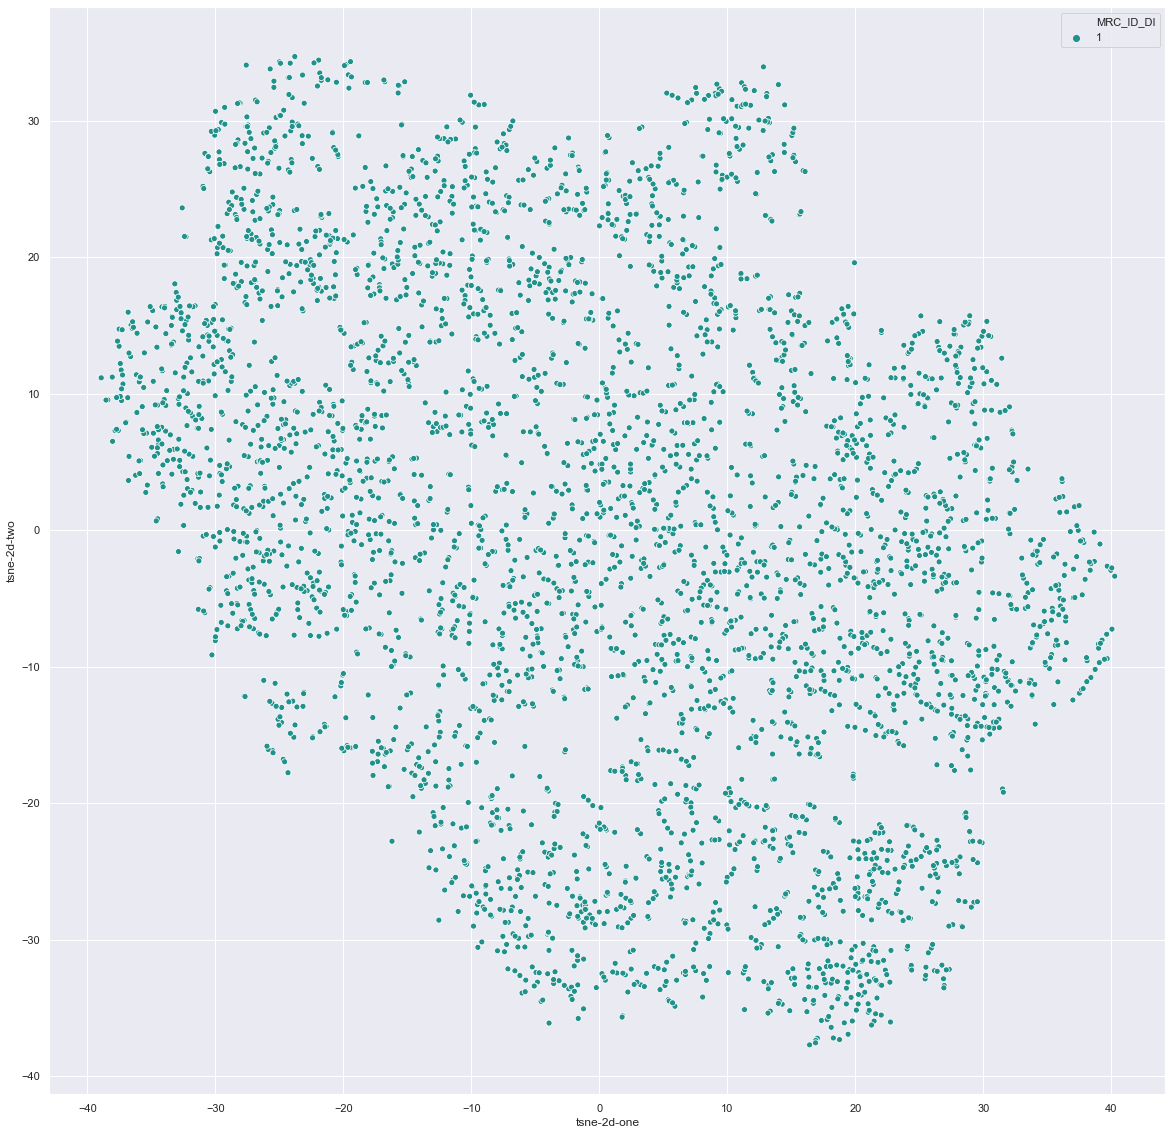

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1586 samples in 0.002s...
[t-SNE] Computed neighbors for 1586 samples in 0.057s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1586
[t-SNE] Computed conditional probabilities for sample 1586 / 1586
[t-SNE] Mean sigma: 0.132996
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.681061
[t-SNE] KL divergence after 500 iterations: 1.462525


<Figure size 1440x1440 with 0 Axes>

3번 클라스입니다.


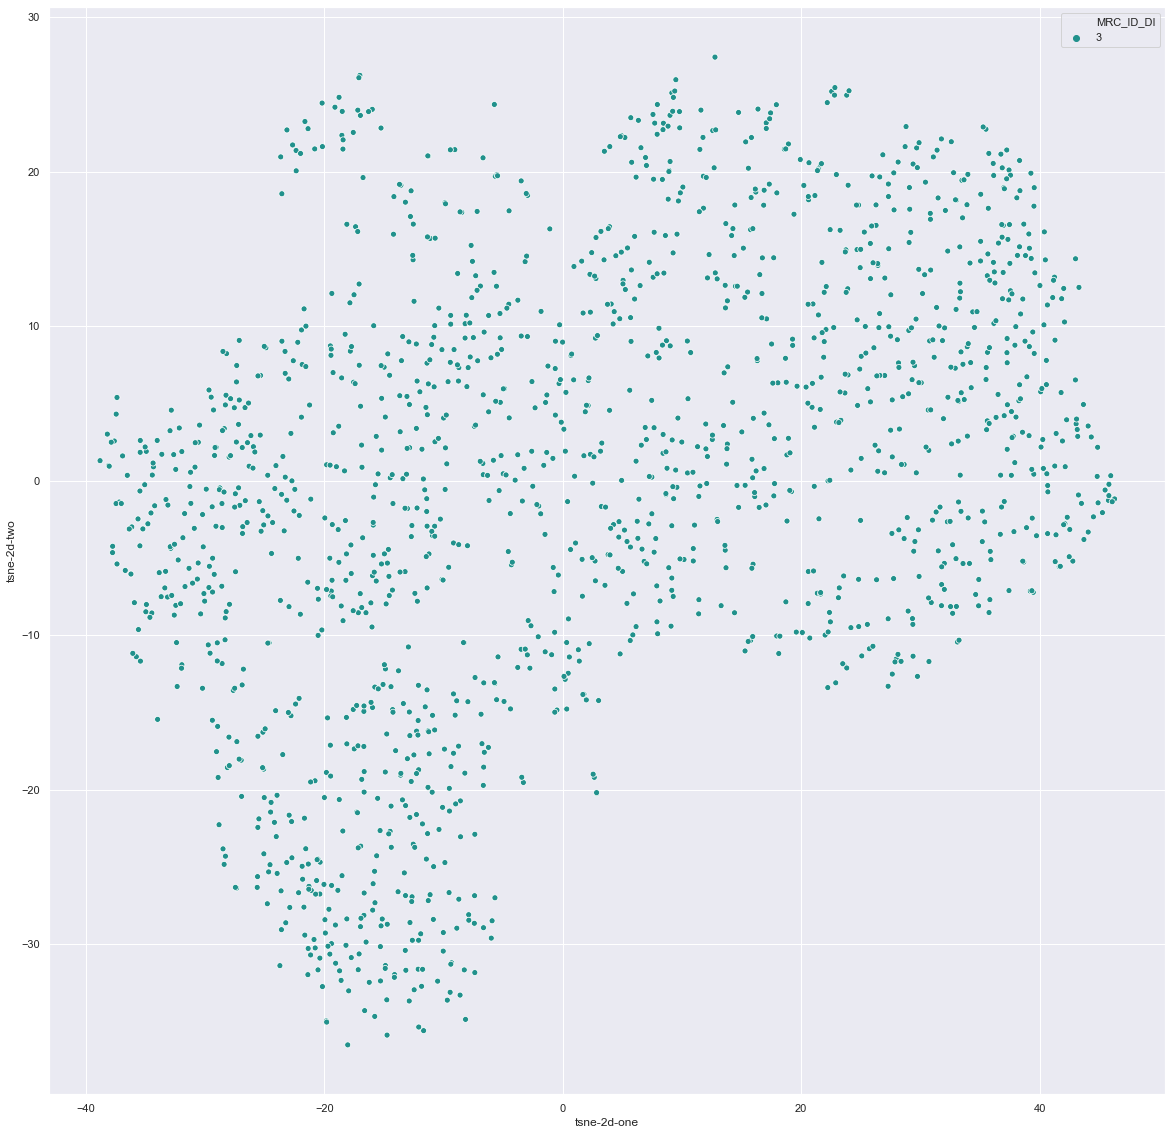

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7080 samples in 0.066s...
[t-SNE] Computed neighbors for 7080 samples in 1.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7080
[t-SNE] Computed conditional probabilities for sample 2000 / 7080
[t-SNE] Computed conditional probabilities for sample 3000 / 7080
[t-SNE] Computed conditional probabilities for sample 4000 / 7080
[t-SNE] Computed conditional probabilities for sample 5000 / 7080
[t-SNE] Computed conditional probabilities for sample 6000 / 7080
[t-SNE] Computed conditional probabilities for sample 7000 / 7080
[t-SNE] Computed conditional probabilities for sample 7080 / 7080
[t-SNE] Mean sigma: 0.110279
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.105698
[t-SNE] KL divergence after 500 iterations: 2.219590


<Figure size 1440x1440 with 0 Axes>

5번 클라스입니다.


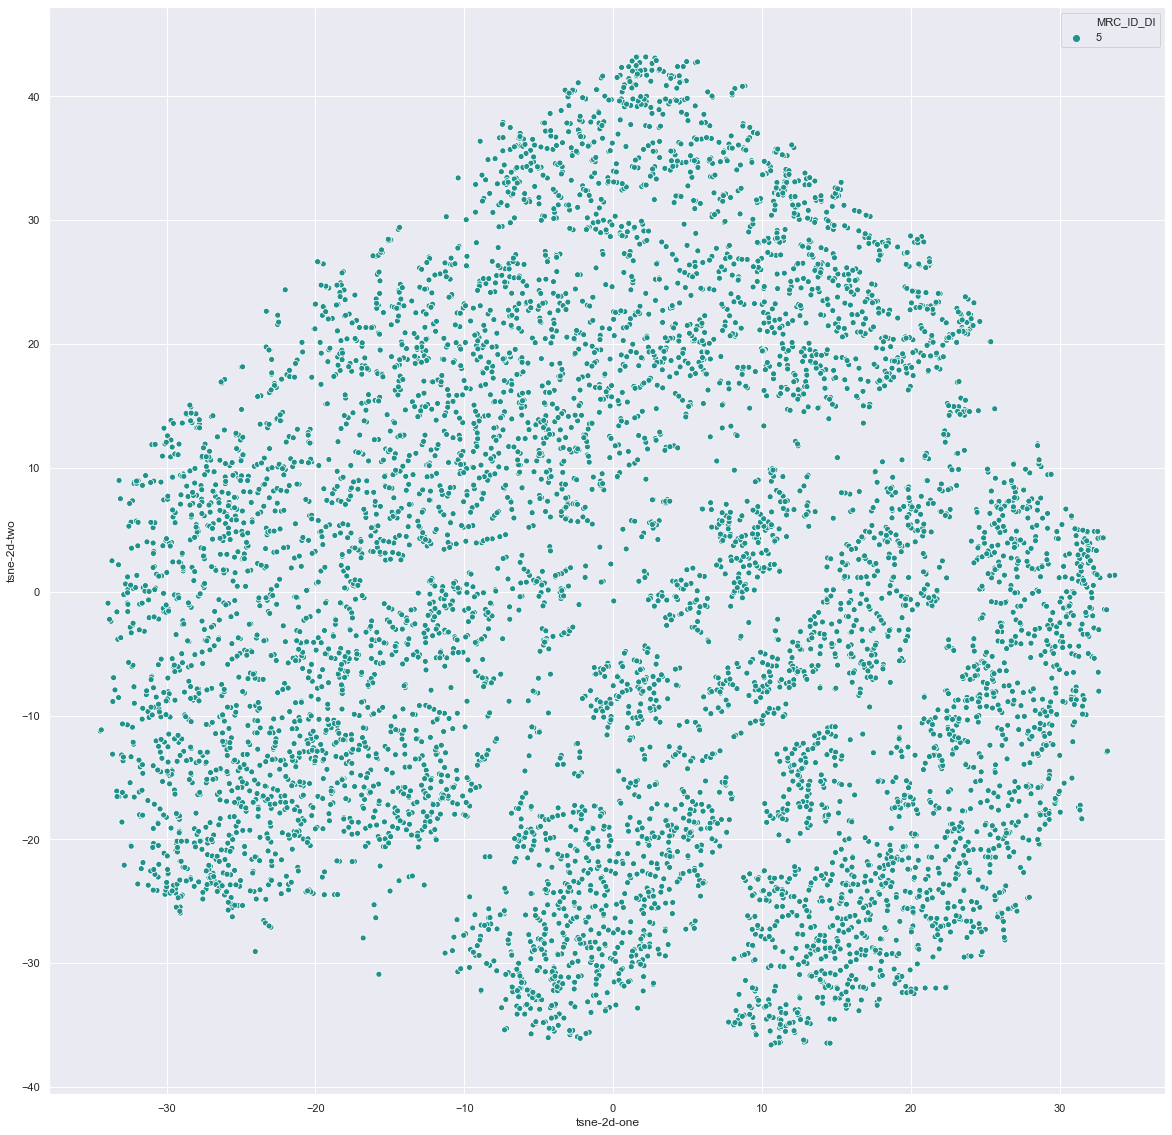

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32665 samples in 1.213s...
[t-SNE] Computed neighbors for 32665 samples in 88.177s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32665
[t-SNE] Computed conditional probabilities for sample 2000 / 32665
[t-SNE] Computed conditional probabilities for sample 3000 / 32665
[t-SNE] Computed conditional probabilities for sample 4000 / 32665
[t-SNE] Computed conditional probabilities for sample 5000 / 32665
[t-SNE] Computed conditional probabilities for sample 6000 / 32665
[t-SNE] Computed conditional probabilities for sample 7000 / 32665
[t-SNE] Computed conditional probabilities for sample 8000 / 32665
[t-SNE] Computed conditional probabilities for sample 9000 / 32665
[t-SNE] Computed conditional probabilities for sample 10000 / 32665
[t-SNE] Computed conditional probabilities for sample 11000 / 32665
[t-SNE] Computed conditional probabilities for sample 12000 / 32665
[t-SNE] Computed conditional probabilities for sa

<Figure size 1440x1440 with 0 Axes>

7번 클라스입니다.


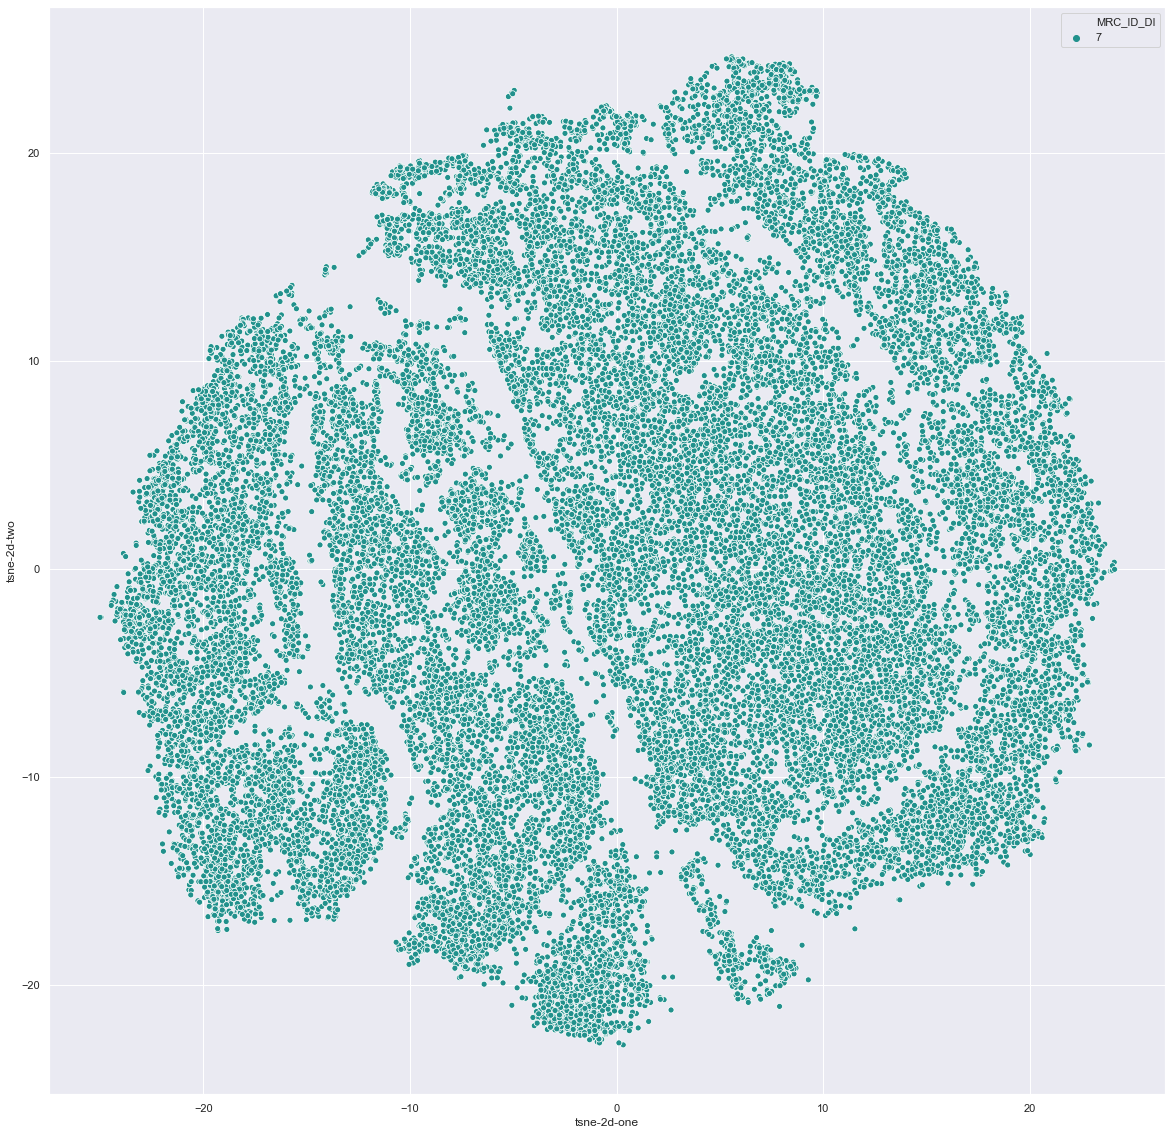

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2923 samples in 0.008s...
[t-SNE] Computed neighbors for 2923 samples in 0.185s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2923
[t-SNE] Computed conditional probabilities for sample 2000 / 2923
[t-SNE] Computed conditional probabilities for sample 2923 / 2923
[t-SNE] Mean sigma: 0.118864
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.032898
[t-SNE] KL divergence after 500 iterations: 1.799459


<Figure size 1440x1440 with 0 Axes>

9번 클라스입니다.


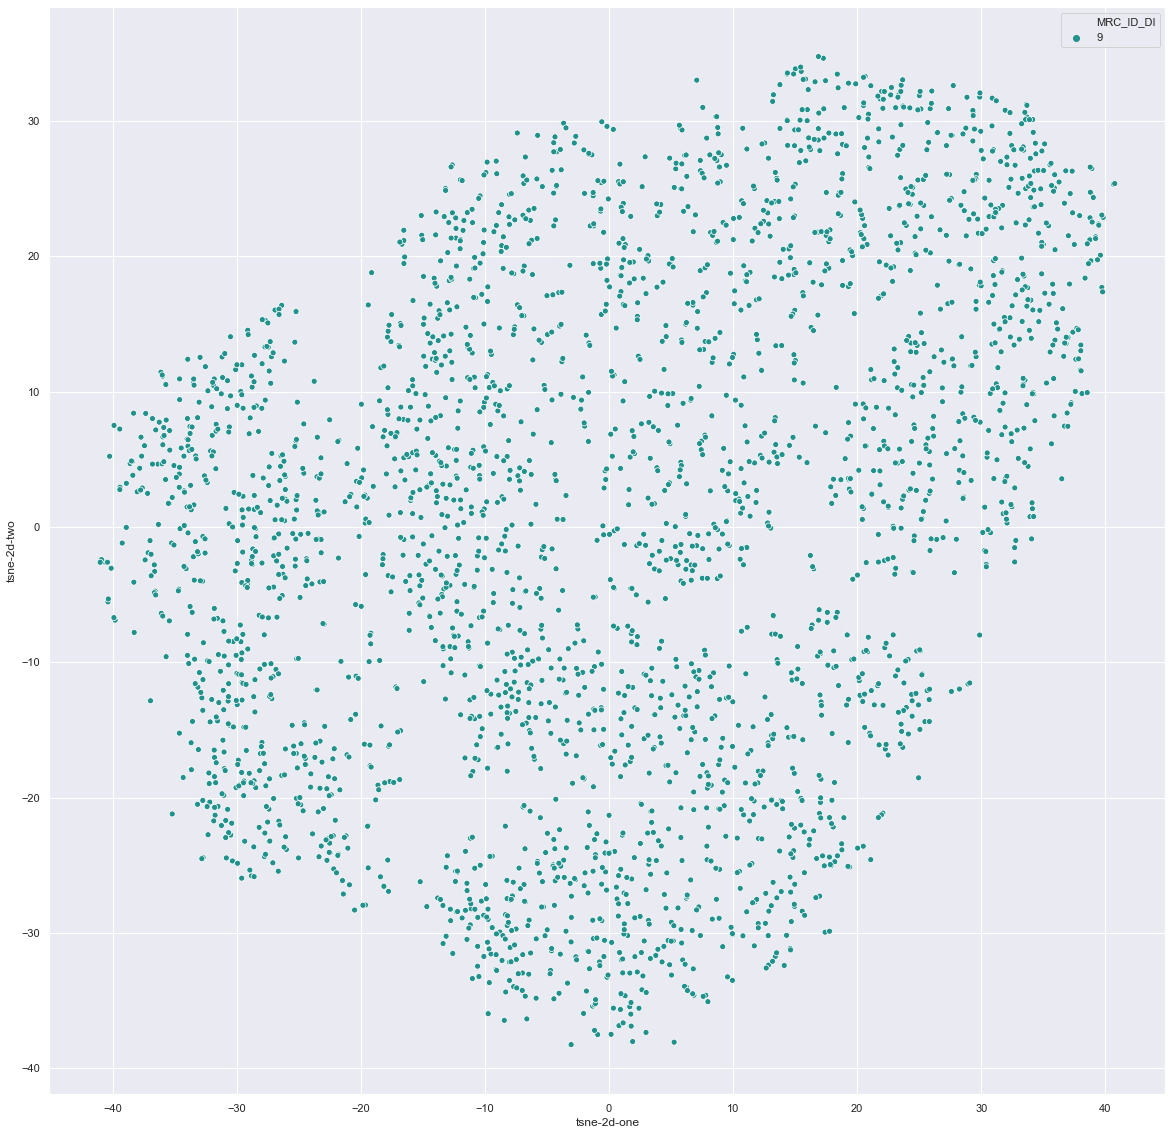

In [18]:
dict_df_class = {}
for i in range(1, 10, 2):
    dict_df_class[i] = df[df['MRC_ID_DI']==i][new_column]
    df_class_num_values = dict_df_class[i].iloc[:, 31:].values
    
    distance_matrix_doc = pairwise_distances(df_class_num_values, df_class_num_values, metric='cosine', n_jobs=-1)
    tsne_doc = TSNE(metric="precomputed", n_components=2, verbose=1, perplexity=30, n_iter=500)
    tsne_results_doc = tsne_doc.fit_transform(distance_matrix_doc)
    
    tsne_doc_df = pd.DataFrame()
    tsne_doc_df['tsne-2d-one'] = tsne_results_doc[:,0]
    tsne_doc_df['tsne-2d-two'] = tsne_results_doc[:,1]
    
    tsne_doc_concat = pd.concat([dict_df_class[i].reset_index().drop(columns=['index'])['cst_id_di'], tsne_doc_df.reset_index().drop(columns=['index'])], axis=1)
    tsne_doc_concat = tsne_doc_concat.merge(dict_df_class[i].iloc[:, :2], how="left", on="cst_id_di")
    
    plt.figure(figsize=(20, 20))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue='MRC_ID_DI',
        palette=sns.color_palette("viridis", tsne_doc_concat['MRC_ID_DI'].nunique()),
        data=tsne_doc_concat,
        legend="full",
        alpha=1
    );
    print('{}번 클라스입니다.'.format(i))
    plt.show();